# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión lineal: Lección 9**
### **Regresión lineal: Intro**

---

In [9]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Para navegar entre directorios
# -----------------------------
import os

plt.rcParams["figure.figsize"] = (10,8)

# Para evitar que salgan los warnings en jupyter
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

pd.options.display.max_columns = None

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).


In [4]:
df_socio = pd.read_csv('../datos/esperanza_vida_transformado.csv', index_col=0)
df_socio.head(2)

,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,health_physicians,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pop_using_improved_drinking_water_urban,pop_using_improved_drinking_water_rural,pollution_index,life_expectancy_at_birth_total_bc,region_CentralAmerica,region_EasternAsia,region_EasternEurope,region_NorthernAfrica,region_NorthernAmerica,region_NorthernEurope,region_Oceania,region_South-easternAsia,region_SouthAmerica,region_SouthernAfrica,region_SouthernAsia,region_SouthernEurope,region_WesternAsia,region_WesternEurope
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argentina,-0.178879,-0.273196,1.103154,-0.439011,-1.075299,0.742566,0.906869,3,0.131610,-0.436682,-1.655219,0.201586,0.587938,0.057166,1.596496e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Australia,-0.262734,-0.283298,0.771296,1.362030,0.630170,0.837385,0.552498,2,1.015861,1.027351,-0.217071,0.669888,0.693603,-1.285658,2.611737e+11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

 - Deberéis separar la X y la y.
 - Deberéis crear el train y el test.
 - Ajustar vuestro modelo.

In [5]:
#separamos x e y

y = df_socio['life_expectancy_at_birth_total_bc']
x = df_socio.drop('life_expectancy_at_birth_total_bc', axis=1)

In [6]:
y.head()

country
Argentina    1.596496e+11
Australia    2.611737e+11
Austria      2.443653e+11
Belarus      1.320137e+11
Belgium      2.414933e+11
Name: life_expectancy_at_birth_total_bc, dtype: float64

In [7]:
x.head()

,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,health_physicians,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pop_using_improved_drinking_water_urban,pop_using_improved_drinking_water_rural,pollution_index,region_CentralAmerica,region_EasternAsia,region_EasternEurope,region_NorthernAfrica,region_NorthernAmerica,region_NorthernEurope,region_Oceania,region_South-easternAsia,region_SouthAmerica,region_SouthernAfrica,region_SouthernAsia,region_SouthernEurope,region_WesternAsia,region_WesternEurope
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argentina,-0.178879,-0.273196,1.103154,-0.439011,-1.075299,0.742566,0.906869,3,0.131610,-0.436682,-1.655219,0.201586,0.587938,0.057166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Australia,-0.262734,-0.283298,0.771296,1.362030,0.630170,0.837385,0.552498,2,1.015861,1.027351,-0.217071,0.669888,0.693603,-1.285658,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,-0.329221,-0.203413,-0.807657,1.007846,1.297527,1.502115,2.147170,3,1.346827,0.816186,1.431711,0.669888,0.693603,-1.410832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Belarus,-0.326124,-0.249495,0.330143,-0.870509,-0.741621,-1.207708,1.172648,3,-0.355626,-1.175423,1.217519,-0.057212,0.395255,-0.582251,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,-0.317827,0.007568,1.455849,0.819853,1.075075,1.303495,0.198126,2,0.632486,0.660166,-0.365796,0.608270,0.656309,-0.148811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# creamos el train y el test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

lr = LinearRegression(n_jobs = -1)

lr.fit(x_train, y_train)

y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test)

df_train = pd.DataFrame({'real' : y_train, 'predicted' : y_predict_train, 'set' : ['train']* len(y_train)})
df_test = pd.DataFrame({'real' : y_test, 'predicted' : y_predict_test, 'set' : ['test']* len(y_test)})

resultado = pd.concat([df_train, df_test], axis=0)

resultado.head()

,real,predicted,set
country,,,
Brazil,1.478254e+11,1.509737e+11,train
Israel,2.622094e+11,2.451383e+11,train
Belgium,2.414933e+11,2.423560e+11,train
Serbia,1.488658e+11,1.837574e+11,train
Netherlands,2.466086e+11,2.560281e+11,train


In [12]:
resultado['residuo'] = resultado['real'] - resultado['predicted']
resultado.head()

,real,predicted,set,residuo
country,,,,
Brazil,1.478254e+11,1.509737e+11,train,-3.148311e+09
Israel,2.622094e+11,2.451383e+11,train,1.707110e+10
Belgium,2.414933e+11,2.423560e+11,train,-8.627250e+08
Serbia,1.488658e+11,1.837574e+11,train,-3.489168e+10
Netherlands,2.466086e+11,2.560281e+11,train,-9.419541e+09


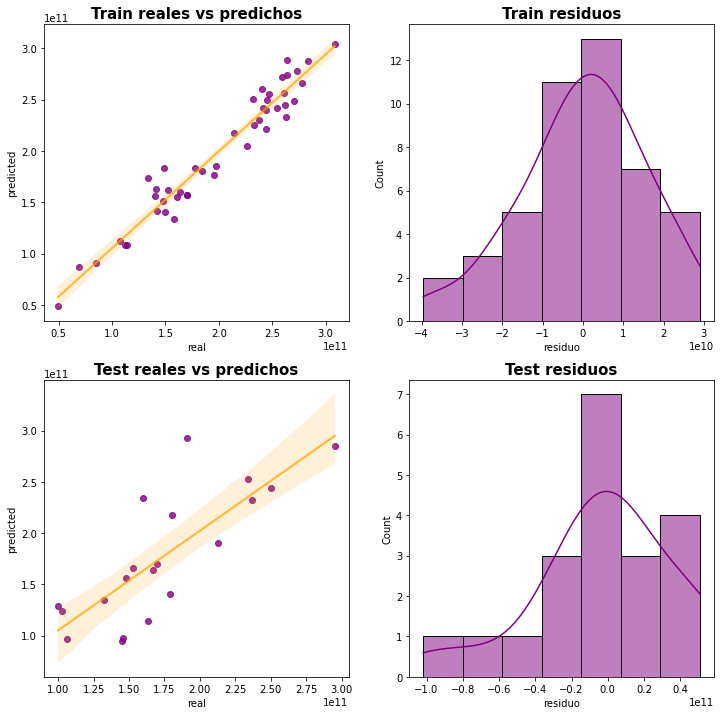

In [18]:
fig, ax = plt.subplots(2,2,figsize=(12,12))

sns.regplot(data = resultado[resultado['set'] == "train"], 
            x = "real", 
            y = "predicted", 
            ax = ax[0,0], 
            color = "purple",
            line_kws = {"color": "orange", "alpha": 0.7 })

sns.regplot(data = resultado[resultado['set'] == "test"], 
            x = "real",
            y = "predicted", 
            color = "purple",
            line_kws = {"color": "orange", "alpha": 0.7 }, 
            ax = ax[1,0])

sns.histplot(resultado[resultado['set'] == "train"],
             x="residuo",
             color ="purple",
             kde=True, 
             ax = ax[0,1])

sns.histplot(resultado[resultado['set'] == "test"],
             x="residuo",
             color = "purple",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");